<a href="https://colab.research.google.com/github/BeautterLife/kubernetes-engine-samples/blob/master/2%EC%B0%A8_%EC%8B%A4%EC%8A%B5_%EC%BD%94%EB%93%9C(Pytorch)_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Data loading

from sklearn.datasets import load_breast_cancer #20163107 박건희 | sklearn.datasets package에서 breast_cancer모듈 import 

cancer = load_breast_cancer() #20163107 | breast_cancer dataset을 load하고 return한다.
data = cancer.data #20163107 | 학습에 필요한 data를 저장할 넘파이 리스트
labels = cancer.target #20163107 | classification labels을 저장할 넘파이 리스트

print(data) #20163107 | data list의 모든 원소 출력
print(labels) #20163107 | labels list의 모든 원소 출력
print(data.shape) #20163107 | data 리스트의 형상 출력

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 

Data loading
============
sklearn.datasets package에서 breast_cancer datataset모듈이 제공하는 dataset을 이용한다.
---------------------------------
breast cancer dataset은 binary classification dataset. 

| Classes  | 2| 
| :------------ | :-----------: | 
| class    | 2          |
| Samples per class    | 212(M), 357(B)      | 
| Samples total     | 569  |
| Dimensionality | 30 |
| Features | real, positive ||



In [0]:
# Split data

from sklearn.model_selection import train_test_split #20163107 | sklearn.model_selection 패키지에서 train_test_split 모듈 imort
#20163107 | 학습을 위해 dataset을 랜덤하게 train, test data으로 나눠준다.
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.1) 
#20163107 | train과 test 데이터 비율을 0.9 : 0.1로 분할한다.
print(len(x_train), len(x_test), type(x_train))
#20163107 | x_train, x_test의 길이 출력, x_train의 타입 출력.
print(x_test) #20163107 | x_test의 모든 원소 출력
print(y_test) #20163107 | y_test의 모든 원소 출력

512 57 <class 'numpy.ndarray'>
[[1.287e+01 1.954e+01 8.267e+01 ... 6.384e-02 3.313e-01 7.735e-02]
 [1.370e+01 1.764e+01 8.776e+01 ... 9.077e-02 2.518e-01 6.960e-02]
 [1.669e+01 2.020e+01 1.071e+02 ... 8.737e-02 4.677e-01 7.623e-02]
 ...
 [1.143e+01 1.731e+01 7.366e+01 ... 6.402e-02 2.584e-01 8.096e-02]
 [1.720e+01 2.452e+01 1.142e+02 ... 1.899e-01 3.313e-01 1.339e-01]
 [8.219e+00 2.070e+01 5.327e+01 ... 7.879e-02 3.322e-01 1.486e-01]]
[1 1 0 1 0 0 0 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 0 0 1 1 1 0 1 0
 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 0 0 1 0 1]


* 데이터를 train, test set으로 분리하는 train_test_split 모듈을 import 한다.
* train : test = 9 : 1 의 비율로 나눈다.
* train_size의 비율은 (1 - 설정한 test_size).

train_test_split()의 return 값
* x_train : training feature
* y_train : training label 
* x_test : test feature
* y_test : test label


In [0]:
# Convert to tensor

import torch #20163107 | torch 모듈 import
import torch.nn as nn #20163107 | 
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from torch.autograd import Variable

#20163107 | 넘파이 배열을 tensor로 변환하는 코드
x_train = Variable(torch.from_numpy(x_train).float())
y_train = Variable(torch.from_numpy(y_train).float())

x_test = Variable(torch.from_numpy(x_test).float())
y_test = Variable(torch.from_numpy(y_test).float())

print(type(x_train))

<class 'torch.Tensor'>


* torch.nn : 
* torch.nn.functional : 신경망 네트워크 구축에 필요한 계층 제공. ex) *Convolution, Pooling, Non-linear activation, Normalization, Linear, Sparse, Distance, Loss Functions.*

* torch.autograd : tensor 연산에 자동 미분 제공 패키지.
* autograd.Variable : Tensor를 감싸며 Tensor에 정의된 거의 모든 연산 지원.


In [0]:
# Generating dataset

#20163107 | feature와 label을 묶어줌.
train_set = TensorDataset(x_train, y_train)
test_set = TensorDataset(x_test, y_test)

#20163107 | 데이터 순서를 섞어서 8개씩 데이터를 반환하는 DataLoder
train_loader = DataLoader(train_set, batch_size = 8, shuffle=True)

`TensorDataset( )`: 학습 데이터와 레이블을 묶어준다.

`DataLoader( )`: iterable한 dataset을 제공. batch_size와 shuffle 설정 제공.
   

In [0]:
# Construct model
#20163107 | 네트워크 모델을 설계하는 class
class Model(nn.Module):
  def __init__(self):
    super().__init__()
    
    self.layer1 = nn.Linear(30, 128)
    self.layer2 = nn.Linear(128, 64)
    self.layer3 = nn.Linear(64, 32)
    self.layer4 = nn.Linear(32, 16)
    self.layer5 = nn.Linear(16, 1)
    self.act = nn.ReLU()

  def forward(self,x):
    x = self.act(self.layer1(x))
    x = self.act(self.layer2(x))
    x = self.act(self.layer3(x))
    x = self.act(self.layer4(x))
    x = self.layer5(x)
    x = torch.sigmoid(x)
    
    return x

model = Model()
print(model)


Model(
  (layer1): Linear(in_features=30, out_features=128, bias=True)
  (layer2): Linear(in_features=128, out_features=64, bias=True)
  (layer3): Linear(in_features=64, out_features=32, bias=True)
  (layer4): Linear(in_features=32, out_features=16, bias=True)
  (layer5): Linear(in_features=16, out_features=1, bias=True)
  (act): ReLU()
)


In [0]:
# Configure optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [0]:
# Training

epochs = 200
losses = list()
losses2 = list()
accuracies = list()
accuracies2 = list()

for epoch in range(epochs):
  epoch_loss = 0  
  epoch_loss2 = 0  
  epoch_accuracy = 0
  epoch_accuracy2 = 0

  for x, y in train_loader:
  
    optimizer.zero_grad()

    output = model(x)

    loss = F.binary_cross_entropy(output, y)
    loss.backward()
    
    optimizer.step()
    
    output[output>=0.5] = 1
    output[output<0.5] = 0
    accuracy = sum(sum(y.data.numpy() == output.data.T.numpy()))

    epoch_loss += loss.item()
    epoch_accuracy += accuracy
  

  epoch_loss /= len(train_loader)
  epoch_accuracy /= len(x_train)
  print(str(epoch+1).zfill(3), "loss :", round(epoch_loss,4),"accuracy :", round(epoch_accuracy,4))
  
  losses.append(epoch_loss)
  losses2.append(epoch_loss)
  accuracies.append(epoch_accuracy)
  accuracies2.append(epoch_accuracy)

  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Using a target size (torch.Size([8])) that is different to the input size (torch.Size([8, 1])) is deprecated. Please ensure they have the same size.


001 loss : 0.2076 accuracy : 0.9219
002 loss : 0.2077 accuracy : 0.9141
003 loss : 0.2012 accuracy : 0.9258
004 loss : 0.2001 accuracy : 0.9141
005 loss : 0.1893 accuracy : 0.9238
006 loss : 0.1963 accuracy : 0.9141
007 loss : 0.2004 accuracy : 0.918
008 loss : 0.2073 accuracy : 0.9102
009 loss : 0.2044 accuracy : 0.9219
010 loss : 0.1931 accuracy : 0.9238
011 loss : 0.196 accuracy : 0.9199
012 loss : 0.1945 accuracy : 0.9219
013 loss : 0.1894 accuracy : 0.9316
014 loss : 0.2037 accuracy : 0.916
015 loss : 0.1954 accuracy : 0.9219
016 loss : 0.1946 accuracy : 0.9238
017 loss : 0.1862 accuracy : 0.9277
018 loss : 0.1934 accuracy : 0.9199
019 loss : 0.1912 accuracy : 0.9199
020 loss : 0.2014 accuracy : 0.9199
021 loss : 0.2011 accuracy : 0.9199
022 loss : 0.2009 accuracy : 0.9219
023 loss : 0.1998 accuracy : 0.9199
024 loss : 0.1893 accuracy : 0.9238
025 loss : 0.1986 accuracy : 0.9141
026 loss : 0.1864 accuracy : 0.9316
027 loss : 0.195 accuracy : 0.9199
028 loss : 0.2013 accuracy : 0.9

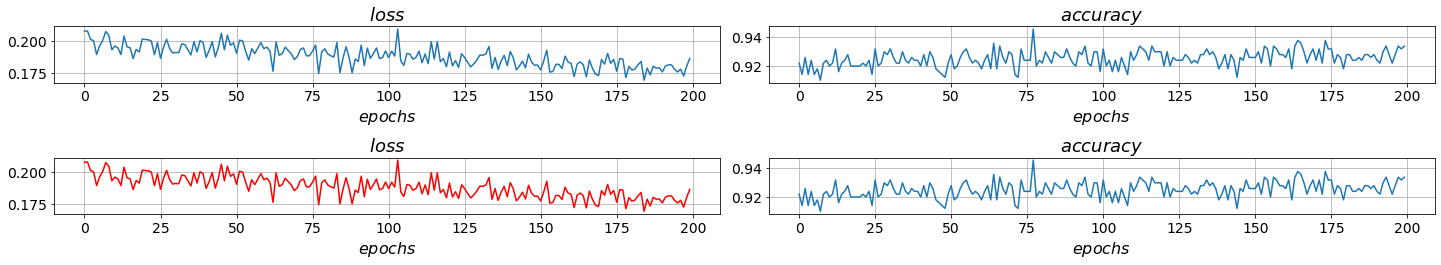

In [0]:
# Plot result

import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))
plt.subplots_adjust(wspace=0.2)

plt.subplot(3,2,1)
plt.title("$loss$",fontsize = 18)
plt.plot(losses)
plt.grid()
plt.xlabel("$epochs$", fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)


plt.subplot(3,2,3)
plt.title("$loss$",fontsize = 18)
plt.plot(losses2,'r')

plt.grid()
plt.xlabel("$epochs$", fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)


plt.subplot(3,2,2)
plt.title("$accuracy$", fontsize = 18)
plt.plot(accuracies)
plt.grid()
plt.xlabel("$epochs$", fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.subplot(3,2,4)
plt.title("$accuracy$", fontsize = 18)
plt.plot(accuracies2)
plt.grid()
plt.xlabel("$epochs$", fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.tight_layout()
plt.show()

In [0]:
# Test

output = model(x_test)
output[output>=0.5] = 1
output[output<0.5] = 0

accuracy = sum(sum(y_test.data.numpy() == output.data.T.numpy())) /len(y_test)

print("test_set accuracy :", round(accuracy,4))

test_set accuracy : 0.9474
